In [46]:
import pandas as pd

In [47]:
df = pd.read_csv('../data/allocine_gold.csv')  #/home/apprenant/Bureau/ML_recap/data/allocine_gold.csv


In [48]:
import numpy as np

# Appliquer le logarithme naturel à la colonne 'actors_popularity'
df['actor_1_popularity'] = round(np.log1p(df['actor_1_popularity']), 6)
df['actor_2_popularity'] = round(np.log1p(df['actor_2_popularity']), 6)
df['actor_3_popularity'] = round(np.log1p(df['actor_3_popularity']), 6)
df['actors_popularity'] = round(np.log1p(df['actors_popularity']), 6)
df['director_popularity'] = round(np.log1p(df['director_popularity']), 6)
df['duree'] = round(np.log1p(df['duree']), 6)
# df['reputation_distributeur_1'] = round(np.log1p(df['reputation_distributeur_1']), 6)
# df['nombre_films_distributeur'] = round(np.log1p(df['nombre_films_distributeur']), 6)
df['moyenne_entrees_par_distributeur'] = round(np.log1p(df['moyenne_entrees_par_distributeur']), 6)

#df['budget'] = round(np.log1p(df['budget']), 6)
#df['budget'] = df['budget'] / df['budget'].max()


In [49]:
df.describe()

,note_presse,duree,nominations,prix,annee_production,Entrees_1ere_semaine,actor_1_popularity,actor_2_popularity,actor_3_popularity,director_popularity,actors_popularity,budget,moyenne_entrees_par_distributeur,reputation_distributeur,nombre_films_distributeur
count,7455.000000,7455.000000,7455.000000,7455.000000,7455.000000,7.455000e+03,7455.000000,7455.000000,7455.000000,7455.000000,7455.000000,7.455000e+03,7455.000000,7455.000000,7455.000000
mean,3.077855,4.631384,1.660496,1.850034,2012.682227,1.556107e+05,2.227870,2.116230,1.932261,1.266182,3.199356,1.545907e+07,10.982667,344.563380,132.301408
std,0.641621,0.223449,2.932011,4.651042,6.797704,3.001804e+05,1.088187,1.052864,1.018934,0.721432,1.057162,3.835177e+07,1.947137,90.136792,105.336689
min,1.000000,0.000000,0.000000,0.000000,1926.000000,4.000000e+00,0.470004,0.470004,0.470004,0.470004,1.029619,0.000000e+00,1.791759,1.000000,1.000000
25%,2.700000,4.521789,0.000000,0.000000,2009.000000,7.218500e+03,1.355320,1.280933,1.094939,0.683097,2.448243,0.000000e+00,9.863676,289.000000,36.000000
50%,3.100000,4.615121,0.000000,0.000000,2013.000000,4.923700e+04,2.199999,2.115050,1.830499,1.097278,3.186353,0.000000e+00,11.518059,381.000000,122.000000
75%,3.500000,4.727388,2.000000,0.000000,2018.000000,1.671530e+05,3.107184,2.962021,2.745699,1.699004,4.100642,1.000000e+07,12.501802,415.000000,181.000000
max,5.000000,6.298949,53.000000,62.000000,2023.000000,2.935984e+06,6.302194,6.302194,6.302194,4.476302,6.504564,4.600000e+08,14.236993,435.000000,405.000000


## Model Ml

In [50]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_hist_gradient_boosting  # Permet d'activer HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor


In [51]:
df  = df.dropna()

In [52]:
df.columns

Index(['titre', 'acteur_1', 'acteur_2', 'acteur_3', 'realisateur',
       'distributeur', 'note_presse', 'duree', 'genre', 'pays', 'type',
       'nominations', 'prix', 'annee_production', 'Semaine',
       'Entrees_1ere_semaine', 'actor_1_popularity', 'actor_2_popularity',
       'actor_3_popularity', 'director_popularity', 'vacances', 'saison',
       'actors_popularity', 'langue', 'budget', 'genre1', 'genre2',
       'moyenne_entrees_par_distributeur', 'reputation_distributeur',
       'nombre_films_distributeur'],
      dtype='object')

In [53]:
df['max_pop_actors'] = df[['actor_1_popularity', 'actor_2_popularity', 'actor_3_popularity']].max(axis=1)

In [54]:
max(1,2,3)

3

In [55]:
df.shape

(7455, 31)

In [56]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

# # Séparer les colonnes catégorielles et numériques
# categorical_features = ['vacances', 'saison', 'pays', 'genre', 'annee_production', 'langue', 'type']
# numeric_features = ['actor_1_popularity', 'actor_2_popularity',
#        'actor_3_popularity','duree', 'director_popularity', 'reputation_distributeur', 'nombre_films_distributeur', 'budget']




categorical_features = ['vacances', 'saison', 'pays', 'annee_production',  'type', 'genre', 'distributeur', 'genre1', 'langue',  ]

numeric_features = ['duree', 'director_popularity',  'max_pop_actors', 'budget', ]





# Créer les transformers pour les colonnes catégorielles et numériques
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = RobustScaler()

y = df['Entrees_1ere_semaine']
X = df[categorical_features+numeric_features]
# Créer le préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ]
)



model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', CatBoostRegressor())
])

# Paramètres pour CatBoostRegressor
param_distributions = {
    'regressor__iterations': [50, 100, 150, 200, 250],  # Nombre d'itérations d'entraînement
    'regressor__depth': [4, 6, 8, 10],  # Profondeur de l'arbre
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],  # Taux d'apprentissage
    'regressor__l2_leaf_reg': [1, 3, 5, 7]  # Régularisation L2
}

# param_distributions = {
#     'regressor__iterations': [50, 100, 150, 200, 250, 300],  # Nombre d'itérations d'entraînement
#     'regressor__depth': [4, 6, 8, 10, 12],  # Profondeur de l'arbre
#     'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # Taux d'apprentissage
#     'regressor__l2_leaf_reg': [1, 3, 5, 7, 9],  # Régularisation L2
#     'regressor__random_strength': [0.1, 0.5, 1, 1.5],  # Force de la régularisation de l'arbre aléatoire
#     'regressor__bagging_temperature': [0.1, 0.5, 1, 1.5],  # Température de bagging
#      'regressor__border_count': [32, 64, 128, 256],  # Nombre de valeurs dans l'histogramme pour les features catégorielles
# #    'regressor__random_seed': [42],  # Graine aléatoire pour la reproductibilité
#      'regressor__early_stopping_rounds': [10, 20, 30],  # Arrêt anticipé après un certain nombre d'itérations sans amélioration
#      'regressor__eval_metric': ['RMSE', 'MAE'],  # Métrique d'évaluation ('RMSE': racine carrée de l'erreur quadratique moyenne, 'MAE': erreur absolue moyenne)
# #     'regressor__use_best_model': [True, False],  # Utiliser le meilleur modèle lors de l'arrêt anticipé
# #     'regressor__cat_features': [['feature1', 'feature2'], None],  # Liste des noms de features catégorielles (remplacez 'feature1', 'feature2', etc. par les noms réels)
# #     # Ajoutez d'autres hyperparamètres selon les besoins de votre modèle
#  }



# Diviser les données en jeux d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Effectuer la recherche aléatoire des hyperparamètres
random_search = RandomizedSearchCV(model, param_distributions, n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres:")
print(random_search.best_params_)

# Obtenir le meilleur modèle entraîné avec les meilleurs hyperparamètres
best_model = random_search.best_estimator_

# Faire des prédictions avec le meilleur modèle sur les données de test
y_pred = best_model.predict(X_test)


0:	learn: 284687.9321645	total: 5.29ms	remaining: 259ms
1:	learn: 268259.6047895	total: 11.9ms	remaining: 287ms
2:	learn: 255663.8158507	total: 21.1ms	remaining: 331ms
3:	learn: 243140.8325909	total: 26.5ms	remaining: 305ms
4:	learn: 235818.8046800	total: 32.2ms	remaining: 290ms
5:	learn: 228696.0689042	total: 37.8ms	remaining: 277ms
6:	learn: 223134.6263524	total: 43ms	remaining: 264ms
7:	learn: 217510.8241816	total: 47.9ms	remaining: 252ms
8:	learn: 213263.2837687	total: 53.3ms	remaining: 243ms
9:	learn: 209860.5863979	total: 58.5ms	remaining: 234ms
10:	learn: 207183.7870182	total: 64ms	remaining: 227ms
11:	learn: 203403.3744131	total: 68.5ms	remaining: 217ms
12:	learn: 200202.1816157	total: 73.1ms	remaining: 208ms
13:	learn: 197319.0881241	total: 77.3ms	remaining: 199ms
14:	learn: 194619.8822828	total: 82.2ms	remaining: 192ms
15:	learn: 193267.8478530	total: 87.2ms	remaining: 185ms
16:	learn: 191645.0457082	total: 92.2ms	remaining: 179ms
17:	learn: 189737.3302758	total: 97.7ms	remai

In [57]:
from sklearn.metrics import r2_score
y_pred_train = best_model.predict(X_train)
print("######## accuracy_score : ")
print("TRAIN :", r2_score(y_train, y_pred_train))
print("TEST :", r2_score(y_test, y_pred))

######## accuracy_score : 
TRAIN : 0.850810253302517
TEST : 0.6009192042116223


In [58]:
df.shape

(7455, 31)

In [59]:
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from catboost import CatBoostRegressor 
# from sklearn.linear_model import LinearRegression
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import RandomizedSearchCV
# from lightgbm import LGBMRegressor
# from xgboost import XGBRegressor


# # # Spécifier les hyperparamètres pour LightGBMRegressor
# # hyperparameters_lgbm = {
# #     "boosting_type": "gbdt",
# #     "colsample_bytree": 0.8,
# #     "learning_rate": 0.08421631578947368,
# #     "max_bin": 63,
# #     "max_depth": 5,
# #     "min_data_in_leaf": 45,
# #     "min_split_gain": 0.3157894736842105,
# #     "n_estimators": 100,
# #     "reg_alpha": 0.22499999999999998,
# #     "reg_lambda": 1.2,
# #     "subsample": 0.05,
# #     "subsample_freq": 0
# # }





# # Créer le pipeline complet avec le nouveau modèle RandomForestRegressor
# model = Pipeline([
#     ('preprocessor', preprocessor),
#     ('regressor', RandomForestRegressor())
     
# ])


# # RandomForest
# param_distributions = {
#     'regressor__n_estimators': [50, 100, 150, 200, 250],
#     'regressor__max_depth': [None, 5, 10, 15, 20],
#     'regressor__min_samples_split': [2, 5, 10, 15],
#     'regressor__min_samples_leaf': [1, 2, 4, 6],
#     # 'regressor__max_features': ['auto', 'sqrt', 'log2', None],
# }



# # # XGBoost
# # param_distributions = {
# #     'regressor__n_estimators': np.arange(50, 401, 50),
# #     'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
# #     'regressor__max_depth': [3, 5, 7, 9],
# #     'regressor__min_child_weight': [1, 3, 5, 7],
# #     'regressor__subsample': [0.7, 0.8, 0.9, 1.0],
# #     'regressor__colsample_bytree': [0.7, 0.8, 0.9, 1.0],
# #     'regressor__gamma': [0, 0.1, 0.2, 0.3, 0.4]
# # }

# # # Créer l'objet RandomizedSearchCV pour effectuer la recherche aléatoire
# random_search = RandomizedSearchCV(
#     model, param_distributions=param_distributions, n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42
# )

# # Entraîner le modèle sur les données d'entraînement en utilisant la recherche aléatoire
# random_search.fit(X_train, y_train)

# # Afficher les meilleurs hyperparamètres trouvés
# print("Meilleurs hyperparamètres :")
# print(random_search.best_params_)

# # Accéder au meilleur modèle trouvé (avec les meilleurs hyperparamètres)
# best_model = random_search.best_estimator_




# best_model.score(X_test, y_test)

In [60]:
best_model.score(X_train, y_train)

0.850810253302517

In [61]:
# import pickle

# # Enregistrez le meilleur modèle dans un fichier pickle
# with open('catboost.pkl', 'wb') as file:
#     pickle.dump(best_model, file)

0:	learn: 319721.9085507	total: 2.8ms	remaining: 698ms
1:	learn: 309814.4148175	total: 6.41ms	remaining: 795ms
2:	learn: 301549.6731002	total: 9.34ms	remaining: 769ms
3:	learn: 295945.7449648	total: 11.1ms	remaining: 684ms
4:	learn: 291247.0339432	total: 13.9ms	remaining: 683ms
5:	learn: 284369.2455848	total: 16.9ms	remaining: 688ms
6:	learn: 280253.5575069	total: 20ms	remaining: 695ms
7:	learn: 275026.2406467	total: 23ms	remaining: 695ms
8:	learn: 268447.6211881	total: 25.6ms	remaining: 686ms
9:	learn: 264561.3830727	total: 28.2ms	remaining: 677ms
10:	learn: 258862.3009100	total: 31.3ms	remaining: 680ms
11:	learn: 255123.4087326	total: 34.2ms	remaining: 678ms
12:	learn: 251486.1876162	total: 36.8ms	remaining: 672ms
13:	learn: 247028.2696447	total: 39.4ms	remaining: 665ms
14:	learn: 242997.4811967	total: 42.1ms	remaining: 660ms
15:	learn: 240398.4609688	total: 44.6ms	remaining: 652ms
16:	learn: 236539.1455624	total: 47.3ms	remaining: 648ms
17:	learn: 231735.9327996	total: 49.8ms	remain

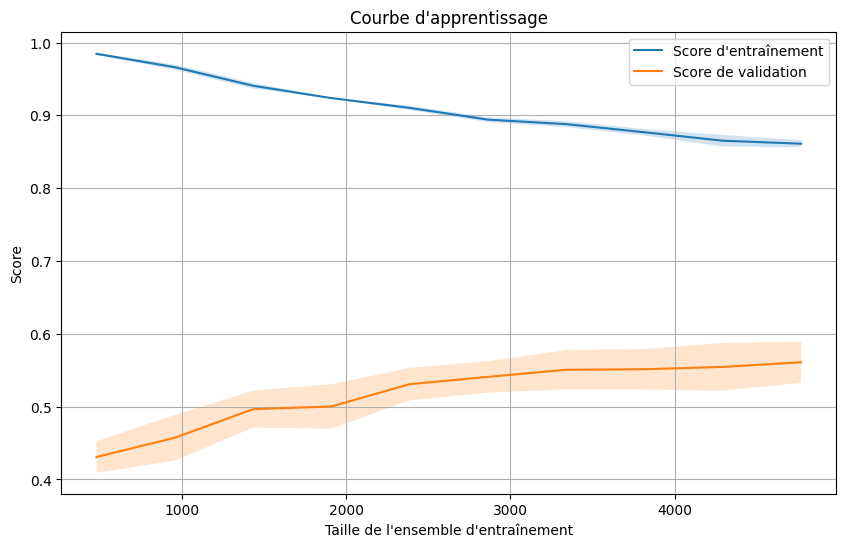

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

# Définir les tailles des ensembles d'entraînement pour la courbe d'apprentissage
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculer les scores d'apprentissage et de validation pour chaque taille d'ensemble d'entraînement
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, train_sizes=train_sizes, cv=5
)

# Calculer les moyennes et écart-types des scores d'apprentissage et de validation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Score d\'entraînement')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
plt.plot(train_sizes, test_scores_mean, label='Score de validation')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2)
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Score')
plt.title('Courbe d\'apprentissage')
plt.legend()
plt.grid(True)
plt.show()

0:	learn: 295826.2302582	total: 61.3ms	remaining: 3s
0:	learn: 279775.9558970	total: 67.8ms	remaining: 3.32s
1:	learn: 285859.8236237	total: 102ms	remaining: 2.44s
1:	learn: 268710.5585000	total: 114ms	remaining: 2.74s
0:	learn: 295826.2302582	total: 113ms	remaining: 11.2s
2:	learn: 277101.4789353	total: 149ms	remaining: 2.34s
1:	learn: 285859.8236237	total: 137ms	remaining: 6.71s
0:	learn: 279775.9558970	total: 139ms	remaining: 13.7s
2:	learn: 259236.6951115	total: 159ms	remaining: 2.49s
2:	learn: 277101.4789353	total: 158ms	remaining: 5.11s
3:	learn: 267954.4740890	total: 196ms	remaining: 2.25s
3:	learn: 267954.4740890	total: 177ms	remaining: 4.24s
3:	learn: 251208.2808814	total: 190ms	remaining: 2.19s
4:	learn: 261895.1868032	total: 192ms	remaining: 3.64s
5:	learn: 255289.8311960	total: 200ms	remaining: 3.13s
1:	learn: 268710.5585000	total: 193ms	remaining: 9.46s
4:	learn: 261895.1868032	total: 227ms	remaining: 2.04s
6:	learn: 249058.8683427	total: 211ms	remaining: 2.81s
4:	learn: 2

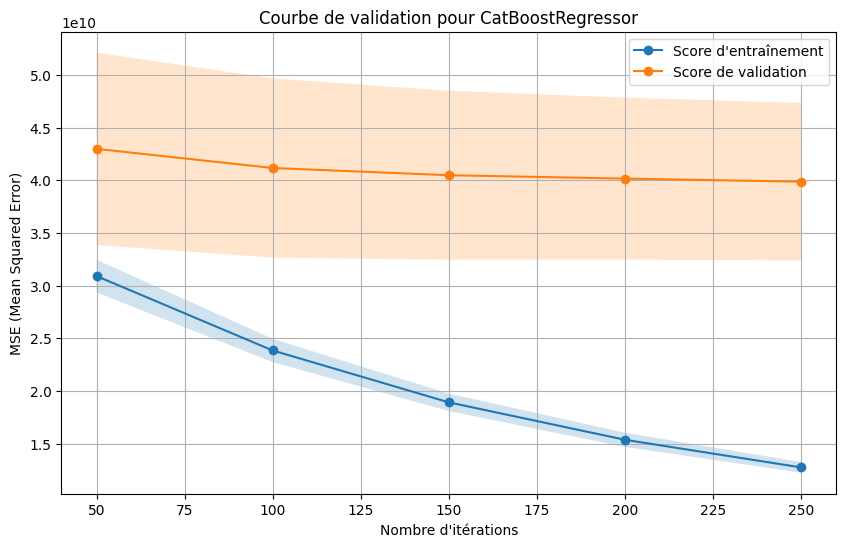

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

# Paramètres pour CatBoostRegressor
param_range = [50, 100, 150, 200, 250]  # Valeurs à tester pour le nombre d'itérations

# Effectuer la validation croisée pour différentes valeurs de l'hyperparamètre
train_scores, test_scores = validation_curve(
    best_model,  # Le modèle CatBoostRegressor
    X_train, y_train,  # Données d'entraînement
    param_name='regressor__iterations',  # Nom de l'hyperparamètre à tester
    param_range=param_range,  # Valeurs à tester pour l'hyperparamètre
    cv=5,  # Nombre de plis pour la validation croisée
    scoring='neg_mean_squared_error',  # Métrique d'évaluation
    n_jobs=-1  # Nombre de cœurs à utiliser pour le calcul en parallèle (utiliser -1 pour utiliser tous les cœurs disponibles)
)

# Calculer les moyennes et écart-types des scores d'entraînement et de validation
train_scores_mean = -np.mean(train_scores, axis=1)  # Nous utilisons le négatif du score car validation_curve retourne le négatif du score MSE
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe de validation
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_scores_mean, label='Score d\'entraînement', marker='o')
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
plt.plot(param_range, test_scores_mean, label='Score de validation', marker='o')
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2)
plt.xlabel('Nombre d\'itérations')
plt.ylabel('MSE (Mean Squared Error)')
plt.title('Courbe de validation pour CatBoostRegressor')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# import pickle

# # Enregistrez le meilleur modèle dans un fichier pickle
# with open('catboost.pkl', 'wb') as file:
#     pickle.dump(best_model, file)